In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
test_images.shape

(10000, 28, 28)

In [5]:
num_classes = len(np.unique(train_labels))

In [6]:
#x_train.shape[1:]
train_images.shape[1:]

(28, 28)

In [7]:
train_labels.shape[1:]

()

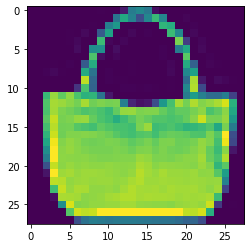

In [8]:
plt.figure()
plt.imshow(train_images[100])

In [18]:
train_images_n = train_images / 255.0
test_images_n = test_images / 255.0

In [19]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

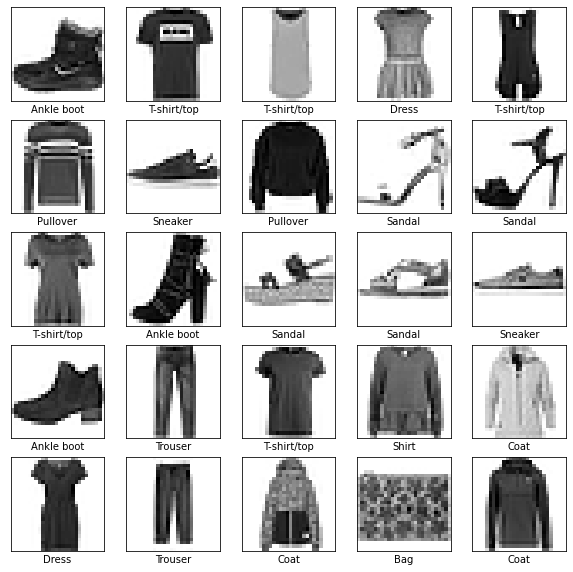

In [20]:
%matplotlib inline

plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

### Creation of the Base Model

In [21]:
model_base = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28)),
              tf.keras.layers.Dense(256, activation = "relu"),
              tf.keras.layers.Dense(128, activation = "relu"),
              tf.keras.layers.Dense(len(class_names), activation = "softmax")
])

In [22]:
model_base.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [23]:
history = model_base.fit(
                        train_images_n,
                        train_labels,
                        epochs= 20, 
)

Epoch 1/20
1875/1875 [==============================] - 7s 2ms/step - loss: 0.7884 - accuracy: 0.7139
Epoch 2/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5346 - accuracy: 0.8066
Epoch 3/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4716 - accuracy: 0.8311
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4342 - accuracy: 0.8441
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4099 - accuracy: 0.8514
Epoch 6/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3898 - accuracy: 0.8584
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3748 - accuracy: 0.8645
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3623 - accuracy: 0.8680
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3498 - accuracy: 0.8734
Epoch 10/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.340

### Base Model Testing

In [24]:
test_loss, test_acc = model_base.evaluate(test_images, test_labels)
print('Accuracy ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 72.3732 - accuracy: 0.7617
Accuracy  0.7616999745368958


In [25]:
predictions = model_base.predict(test_images)

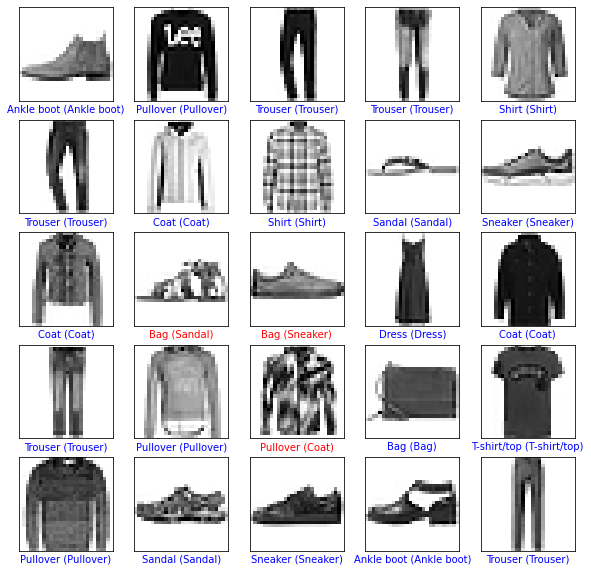

In [26]:
plt.figure(figsize = (10, 10))
for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap = plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'blue'
  else: 
    color = 'red'
    
  plt.xlabel('{} ({})'.format(class_names[predicted_label], class_names[true_label]), color = color)

In [27]:
(train_images_reg, train_images_reg_valid) = train_images[12000:], train_images[:12000] 
(train_labels_reg, train_labels_reg_valid) = train_labels[12000:], train_labels[:12000] 

print("train_images shape", train_images.shape)

print("train;", train_images.shape[0])
print("val;", train_images_reg_valid.shape[0])
print("test;", test_images.shape[0])

train_images shape (60000, 28, 28)
train; 60000
val; 12000
test; 10000


In [28]:
from tensorflow.keras import regularizers

### Model with regularizers

In [29]:
model_optimizer = tf.keras.models.Sequential([
              tf.keras.layers.Flatten(input_shape= (28, 28, 1)),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(len(class_names), activation = "softmax")
])

model_optimizer.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               200960    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

In [30]:
model_optimizer.compile(optimizer= "adam", 
                        loss = "sparse_categorical_crossentropy", 
                        metrics = ["accuracy"])

history_optimizer = model_optimizer.fit(
                                        train_images_reg,
                                        train_labels_reg,
                                        epochs = 20,
                                        
                                    )


Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5714 - accuracy: 0.7966
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4288 - accuracy: 0.8470
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3967 - accuracy: 0.8565
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3757 - accuracy: 0.8670
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3632 - accuracy: 0.8724
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3511 - accuracy: 0.8745
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3436 - accuracy: 0.8790
Epoch 8/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3347 - accuracy: 0.8813
Epoch 9/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3281 - accuracy: 0.8857
Epoch 10/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.322

### Model testing

In [31]:
test_loss, test_acc = model_base.evaluate(test_images, test_labels)
print('Accuracy ', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 72.3732 - accuracy: 0.7617
Accuracy  0.7616999745368958


## Data Generators

Let's set up data generators that will read images in our source folders, convert them to `float32` tensors, and feed them (with their tags) to our network. We will have one generator for the training images and another one for the validation images. Our generators will produce batches of 28x28 size images and their labels.

In [32]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


In [33]:
train_images.shape

(60000, 28, 28, 1)

### Creation of the Convolutional model

In [34]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 7, 7, 32)         

In [35]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [36]:
model.fit(train_images,
         train_labels,
         batch_size=64,
         epochs=20)

Epoch 1/20
938/938 [==============================] - 13s 4ms/step - loss: 1.2433 - accuracy: 0.5251
Epoch 2/20
938/938 [==============================] - 5s 5ms/step - loss: 0.7627 - accuracy: 0.7066
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.7145 - accuracy: 0.7262
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.6866 - accuracy: 0.7369
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.6656 - accuracy: 0.7455
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.6468 - accuracy: 0.7543
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.6342 - accuracy: 0.7592
Epoch 8/20
938/938 [==============================] - 4s 4ms/step - loss: 0.6226 - accuracy: 0.7647
Epoch 9/20
938/938 [==============================] - 4s 4ms/step - loss: 0.6107 - accuracy: 0.7696
Epoch 10/20
938/938 [==============================] - 4s 4ms/step - loss: 0.5984 - accuracy: 0.772

In [37]:
score = model.evaluate(test_images, test_labels, verbose=0)
score

[0.4546063542366028, 0.8319000005722046]

### Callbacks

In [38]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.95:
      print("Our model reach to 95%")
      self.model.stop_training = True


In [39]:
callback = TrainingCallback()

history_callback = model.fit(
    train_images,
    train_labels,
    epochs = 20,
    callbacks = [callback]
     
)

Epoch 1/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5424 - accuracy: 0.7972
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5337 - accuracy: 0.7995
Epoch 3/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5224 - accuracy: 0.8039
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5186 - accuracy: 0.8054
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5158 - accuracy: 0.8058
Epoch 6/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5028 - accuracy: 0.8118
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4998 - accuracy: 0.8129
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4951 - accuracy: 0.8160
Epoch 9/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4927 - accuracy: 0.8159
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.489

In [40]:
def get_model():
  model = tf.keras.models.Sequential([
              tf.keras.layers.Conv2D(75, (3,3), activation = "relu", input_shape= (28, 28, 1)),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
              tf.keras.layers.MaxPool2D((2,2)),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Flatten(),
              tf.keras.layers.Dense(256, kernel_regularizer = regularizers.l2(1e-5), activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(128, kernel_regularizer= regularizers.l2(1e-5),activation = "relu"),
              tf.keras.layers.Dropout(0.2),
              tf.keras.layers.Dense(num_classes, activation = "softmax")
  ])
  return model

model_early = get_model()
model_early.summary()

model_early.compile(optimizer= "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 75)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        21632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 5, 5, 32)         

In [41]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor='accuracy',patience=2)
model.fit(train_images,
         train_labels,
         batch_size=64,
         callbacks=[callback_early],
         epochs=10)

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4524 - accuracy: 0.8319
Epoch 2/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4476 - accuracy: 0.8329
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4478 - accuracy: 0.8334
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4466 - accuracy: 0.8320
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4420 - accuracy: 0.8356
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4459 - accuracy: 0.8339
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4430 - accuracy: 0.8355


### Creation of a functional model with Auto Tunner Keras 

In [42]:
!pip install -q -U keras-tuner
import keras_tuner as kt
from tensorflow import keras

     |████████████████████████████████| 133 kB 5.0 MB/s 


In [43]:
def constructor_modelos(hp):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Conv2D(75, (3,3), activation= "relu", input_shape = (28, 28, 1)))
  model.add(tf.keras.layers.MaxPool2D((2,2)))
  model.add(tf.keras.layers.Flatten())

  hp_units = hp.Int("units", min_value = 32, max_value = 512, step = 32)
  model.add(tf.keras.layers.Dense(units=hp_units,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(128,activation = "relu", kernel_regularizer= regularizers.l2(1e-5)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(num_classes, activation = "softmax"))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  model.compile(optimizer = keras.optimizers.Adam(learning_rate=hp_learning_rate),loss = "categorical_crossentropy", metrics = ["accuracy"])

  return model


In [44]:
tuner = kt.Hyperband(
    constructor_modelos,
    objective = "accuracy",
    max_epochs = 20,
    factor = 3,
    directory = "models/",
    project_name = "Own-tunner"
)

In [45]:
tuner.search(train_images, train_labels, epochs =20)

best_hps = tuner.get_best_hyperparameters(num_trials =1)[0]

Trial 30 Complete [00h 02m 22s]
accuracy: 0.8350499868392944

Best accuracy So Far: 0.8821166753768921
Total elapsed time: 00h 35m 01s
INFO:tensorflow:Oracle triggered exit


In [46]:
print(best_hps.get("units"))

352


In [47]:
print(best_hps.get("learning_rate"))

0.001


In [48]:
hypermodel = tuner.hypermodel.build(best_hps)

history_hypermodel = hypermodel.fit(
    train_images,
    train_labels,
    epochs = 20,
    callbacks = [callback_early]
    
)

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.0128 - accuracy: 0.6122
Epoch 2/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.6283 - accuracy: 0.7661
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5506 - accuracy: 0.7982
Epoch 4/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.5014 - accuracy: 0.8218
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4702 - accuracy: 0.8350
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4512 - accuracy: 0.8416
Epoch 7/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4366 - accuracy: 0.8464
Epoch 8/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.4235 - accuracy: 0.8516
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4136 - accuracy: 0.8565
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.405

### Save model architecture only

In [49]:
config_dict = hypermodel.get_config()

In [50]:
print(config_dict)

{'name': 'sequential_1', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_1_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 75, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}}, 

### Creating a new model from the architecture

In [51]:
model_same_config = tf.keras.Sequential.from_config(config_dict)

In [52]:
model_same_config.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12675)             0         
                                                                 
 dense_3 (Dense)             (None, 352)               4461952   
                                                                 
 dropout_2 (Dropout)         (None, 352)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               45184     
                                                      

### Save and load only the weights

#### Train the model with the checkpoints

In [53]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [54]:
model_weight = get_model()
model_weight.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 13, 13, 75)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 32)        21632     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 5, 5, 32)         

In [55]:
model_weight.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

#### Creating checkpoints of our models with TensorFlow

In [56]:
checkpoint_path = "model_checkpoints/checkpoint"
checkpoint_weighs= ModelCheckpoint(
    filepath = checkpoint_path,
    frecuency = "epoch",
    save_weights_only = True,
    verbose = 1

)



#### The model is trained, and the weights of the model are stored in each step.

In [57]:
history_weight = model_weight.fit(
    train_images,
    train_labels,
    batch_size=64,
    callbacks = [checkpoint_weighs],
    epochs = 20)



Epoch 1/20
938/938 [==============================] - ETA: 0s - loss: 1.0978 - accuracy: 0.5816
Epoch 1: saving model to model_checkpoints/checkpoint
938/938 [==============================] - 5s 5ms/step - loss: 1.0978 - accuracy: 0.5816
Epoch 2/20
934/938 [============================>.] - ETA: 0s - loss: 0.7098 - accuracy: 0.7304
Epoch 2: saving model to model_checkpoints/checkpoint
938/938 [==============================] - 4s 5ms/step - loss: 0.7101 - accuracy: 0.7303
Epoch 3/20
933/938 [============================>.] - ETA: 0s - loss: 0.6344 - accuracy: 0.7585
Epoch 3: saving model to model_checkpoints/checkpoint
938/938 [==============================] - 4s 5ms/step - loss: 0.6342 - accuracy: 0.7586
Epoch 4/20
933/938 [============================>.] - ETA: 0s - loss: 0.5800 - accuracy: 0.7815
Epoch 4: saving model to model_checkpoints/checkpoint
938/938 [==============================] - 5s 5ms/step - loss: 0.5801 - accuracy: 0.7815
Epoch 5/20
936/938 [========================

### Weights are saved manually

In [58]:
model_weight.save_weights("model_manul/my_model")

### The architecture is created and the weights are loaded

In [59]:
model_weights2 = get_model()
model_weights2.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [60]:
model_weights2.load_weights(checkpoint_path)


### Infrastructure and weights are stored

In [66]:
model_complete = get_model()
model_complete.compile(optimizer = "adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

history_complete = model_complete.fit(
    train_images,
    train_labels,
    epochs = 20,
    callbacks = [checkpoint_weighs],
    
)

Epoch 1/20
1869/1875 [============================>.] - ETA: 0s - loss: 1.0415 - accuracy: 0.6008
Epoch 1: saving model to model_checkpoints/checkpoint
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0402 - accuracy: 0.6013
Epoch 2/20
1874/1875 [============================>.] - ETA: 0s - loss: 0.6771 - accuracy: 0.7413
Epoch 2: saving model to model_checkpoints/checkpoint
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6770 - accuracy: 0.7414
Epoch 3/20
1868/1875 [============================>.] - ETA: 0s - loss: 0.5963 - accuracy: 0.7762
Epoch 3: saving model to model_checkpoints/checkpoint
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5964 - accuracy: 0.7761
Epoch 4/20
1864/1875 [============================>.] - ETA: 0s - loss: 0.5495 - accuracy: 0.7963
Epoch 4: saving model to model_checkpoints/checkpoint
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5500 - accuracy: 0.7962
Epoch 5/20
1875/1875 [======

In [67]:
model_complete.save("saved_model_complete/mymodel")

INFO:tensorflow:Assets written to: saved_model_complete/mymodel/assets


In [68]:
model_complete3 = tf.keras.models.load_model("saved_model_complete/mymodel")

### Using the .h5 format to save models

In [69]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [70]:
model_complete3.save("my_model.h5")

In [71]:
model_complete4 = tf.keras.models.load_model("my_model.h5")